In [19]:
# =============================================================================
# PREDICTING PRICE OF PRE-OWNED CARS 
# =============================================================================

import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
# =============================================================================
# Reading CSV file
# =============================================================================
cars_data=pd.read_csv('cars_sampled.csv' )

In [3]:
# =============================================================================
# Creating copy
# =============================================================================
cars=cars_data.copy()

In [4]:
# =============================================================================
# Dropping unwanted columns
# =============================================================================

col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [5]:
# =============================================================================
# Removing duplicate records
# =============================================================================

cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records

In [6]:
# =============================================================================
# Data cleaning
# =============================================================================

# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [6]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [7]:
# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count    42772.000000
mean        14.872642
std          7.093125
min          0.000000
25%         10.330000
50%         14.830000
75%         19.170000
max         67.750000
Name: Age, dtype: float64

In [8]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

In [9]:
# =============================================================================
# Removing insignificant variables
# =============================================================================

col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

In [10]:
"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 
"""

# =============================================================================
# OMITTING MISSING VALUES
# =============================================================================

cars_omit=cars.dropna(axis=0)

In [11]:
#new
cars_omit.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [12]:
cars_omit.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.50
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.00
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.92
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.17
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.92


In [13]:
from sklearn.model_selection import train_test_split
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 9) (9866, 9) (23018,) (9866,)


In [14]:
X_train.columns
# y_train[:10]

Index(['vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType',
       'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [15]:
#new
categorical = ['vehicleType', 'gearbox','model', 'fuelType', 'brand', 'notRepairedDamage']
numerical = ['powerPS','kilometer','Age']

X_train[categorical] = X_train[categorical].astype(str)

In [16]:
X_train.dtypes

vehicleType           object
gearbox               object
powerPS                int64
model                 object
kilometer              int64
fuelType              object
brand                 object
notRepairedDamage     object
Age                  float64
dtype: object

In [17]:

#new

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dv = DictVectorizer()
train_dicts = X_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)


test_dicts = X_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)


# # target = 'price'
y_train = np.log(y_train.values)
y_test = np.log(y_test.values)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

# # Setting intercept as true
# lgr=LinearRegression(fit_intercept=True)

# # Model
# model_lin1=lgr.fit(X_train,y_train)

# # Predicting model on test set
# cars_predictions_lin1 = lgr.predict(X_test)

# # Computing MSE and RMSE
# lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
# lin_rmse1 = np.sqrt(lin_mse1)
# print(lin_rmse1)

0.5336009976402414

/home/modf/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/modf/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

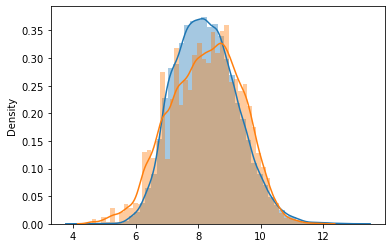

In [18]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [23]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)
